In [101]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# import netflix data csv.
df = pd.read_csv('viewing-activity-data.csv')

In [103]:
# remove coulumns you do not want to analyze by adding them to df.drop
df = df.drop(['Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

In [104]:
# convert Start Time from object to datetime
# attach UTC to datetime format 
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

In [105]:
# change Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

In [106]:
# convert Duration from object to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])

In [107]:
# group and sum profile watch time
df_groupby_profile = df.groupby(['Profile Name'], as_index=False)['Duration'].sum()

In [108]:
# rounds to days
df_groupby_profile['Duration'] = df_groupby_profile['Duration'].dt.days

In [109]:
# convert Duration from timedelta to numeric for graphing
df_groupby_profile['Duration'] = pd.to_numeric(df_groupby_profile['Duration'])

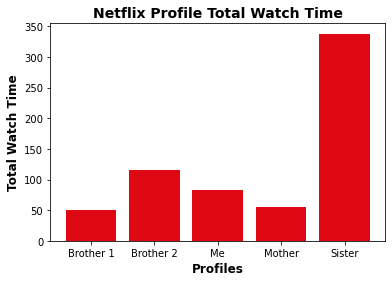

In [121]:
# create bar graph of each Profile's total Duration(watch time)
plt.bar(df_groupby_profile['Profile Name'], df_groupby_profile['Duration'], color = "#DE0912")
plt.title('Netflix Profile Total Watch Time', fontweight = 'bold', fontsize = 14)
plt.xlabel('Profiles', fontweight = 'bold', fontsize = 12)
plt.ylabel('Total Watch Time', fontweight = 'bold', fontsize = 12)
plt.savefig('Netflix Profile Total Watch Time.png')
